Qiwen Hu, Benjamin Trey, Ivan Schwieger<br>
APM115: Mathematical Modeling<br>
Homework 2 (group)<br>
2/18/2021<br>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import ode

<b>Group component (To be completed in groups of 3 or 4. Members of the same group
can turn in the same code and write-up. Please list the names of your group
members.)</b>

<h1>Problem 8</h1>

<i>Climate Complete the climate exercise. Turn in the code and a brief
description of your findings. Note that when the parameters are changed slowly, the
system has enough time to adjust and can stay close to a fixed point corresponding to the
parameters at the time.</i>

<i>1. Use climate_temperature_tendency.m to plot the temperature
tendency (dT/dt) as a function of temperature for the
temperature range of [220, 300] Kelvin.</i><br><br>

In [2]:
sigma=5.67e-8
H=1e8

def climate_tendency(T, S0):
    albedo=max(min(0.6,.3*(1+(273-T)/10)),0.3)
    F=((1-albedo)*S0/4-sigma*T**4)/H
    return F

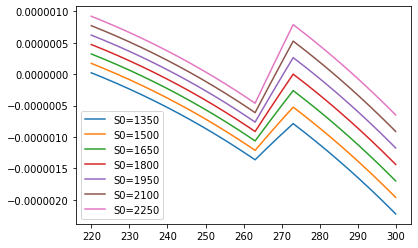

In [3]:
T = np.arange(220,300,0.1)
S = np.arange(1350,2300,150)
for s in S:
    y = [climate_tendency(t,s) for t in T] 
    plt.plot(T, y, label="S0="+str(s))

plt.legend()
plt.show()

<i>2. Find the fixed points and identify their stability</i>

Assuming the fixed temperature is above $273 \mathrm{K}$, at the fixed point $\frac{dT_s}{dt} = 0 \implies T_s = \left(\frac{1-\alpha}{4 \sigma} S_0\right)^\frac{1}{4} \approx 287 K$.
 

In [4]:
fixed_point = ((1-0.3)/4/sigma*2200)**0.25
#fixed_point = (((1-0.3)/(4*sigma))*2200)**0.25
print("fixed point: ", fixed_point)
print("climate tendency: ", climate_tendency(fixed_point, 2200))


fixed point:  287.0578433211224
climate tendency:  -1.7053025658242403e-21


Assuming the fixed temperature is above $263 \mathrm{K}$ but below $273 \mathrm{K}$, at the fixed point $\frac{dT_s}{dt} = 0 \implies T_s \approx 267 K$.

In [13]:
#Newton's Method
old_T = 263
delta=0.001
accuracy=0.001
keep_going = True
while keep_going:
    diff = (climate_tendency(old_T+delta,2200)-climate_tendency(old_T,2200))/delta
    new_T = old_T-climate_tendency(old_T,2200)/diff
    keep_going = abs((old_T-new_T)/new_T)>accuracy and new_T < 273
    old_T = new_T
new_T
    

267.17705123335696

Assuming the fixed temperature is below $263 \mathrm{K}$, at the fixed point $\frac{dT_s}{dt} = 0 \implies T_s = +/- \left(\frac{1-\alpha}{4 \sigma} S_0\right)^\frac{1}{4} \approx +/- 250 K$.

In [27]:
fixed_point = ((1-0.6)/4/sigma*2200)**0.25
print("fixed point: ", fixed_point, -1*fixed_point)
print("climate tendency: ", climate_tendency(fixed_point, 2200), climate_tendency(-1*fixed_point, 2200))


fixed point:  249.5800718944141 -249.5800718944141
climate tendency:  -2.842170943040401e-22 -2.842170943040401e-22


Looking at the slope of the fixed points when they intersect the T-axis the points at $249 \mathrm{K}$ and $287 \mathrm{K}$ are stable, and the point at $267 and -249 \mathrm{K}$ is unstable. 

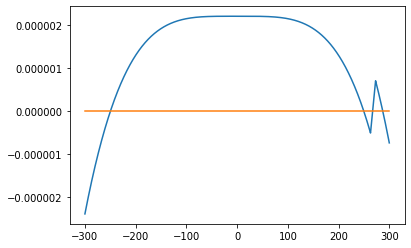

In [16]:
T = np.arange(-300, 300, 0.01)
y = [climate_tendency(t, 2200) for t in T] 
plt.plot(T, y)
plt.plot([-300,300],[0,0])
plt.show()

<i>3. Imagine that we are at the warm stable fixed point. If we slowly
(e.g. over a period of 30000 days) reduce the solar constant
towards 70% of its current value (thought to be the value early
in the solar system history) and compute Ts
. Then gradually
increase the solar constant towards 130% of its current value
(e.g. over a period of 60000 days) and compute Ts
. What do you
see? Can you explain the behavior (hint: graph the two righthand-side terms of the energy balance equation as functions of
S0)? (Note that with the units used here dTs/dt is in units of
Kelvin/second)</i>

##### 1. If we slowly (e.g. over a period of 30000 days) reduce the solar constant towards 70% of its current value

In [28]:
def ode45(f,tint,y0,rtol=1e-9):
    r = ode(f).set_integrator('zvode', method='bdf',rtol=rtol)
    r.set_initial_value(y0, tint[0])
    dt=(tint[1]-tint[0])/1000
    t1 = tint[1]
    tt=[]
    rr=[]
    while r.successful() and r.t < t1:
        tt.append(r.t+dt)
        rr.append(np.real(r.integrate(r.t+dt)))
    return tt,rr

def climate_tendency(t, T, S0):
    albedo=max(min(0.6,.3*(1+(273-T)/10)),0.3)
    F=((1-albedo)*S0/4-sigma*T**4)/H
    return F

Text(0, 0.5, 'Ts')

<Figure size 432x288 with 0 Axes>

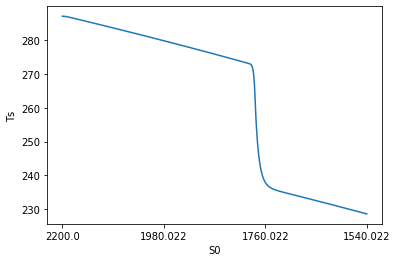

In [41]:
sigma=5.67e-8
H=1e8
S0=2200
Ts=287 # warm stable fix point

ndays=30000
reduce_rate = (S0 - S0*0.7)/ndays
Ts_days = np.zeros(ndays)
S0_change = np.zeros(ndays)

for i in range(ndays):
    if i == 0:
        S0_change[i] = S0
        f = lambda t,y: climate_tendency(t, y, S0)
        tt, rr = ode45(f, [0, 24*3600], Ts)
        Ts_days[i] = rr[len(rr)-1]
        
    else:
        S0_change[i] = S0_change[i-1] - reduce_rate
        f = lambda t,y: climate_tendency(t, y, S0_change[i])
        tt, rr = ode45(f, [0, 24*3600], Ts_days[i-1])
        Ts_days[i] = rr[len(rr)-1]

## plotting S0 vs Ts
plt.figure()
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(Ts_days.tolist())
ax.set_xticks((1, 10000, 20000, 30000)) 
ax.set_xticklabels(np.round(S0_change, 3)[[0, 9999, 19999, 29999]])

plt.xlabel('S0')
plt.ylabel('Ts')



##### 2. Then gradually increase the solar constant towards 130% of its current value (e.g. over a period of 60000 days)

Text(0, 0.5, 'Ts')

<Figure size 432x288 with 0 Axes>

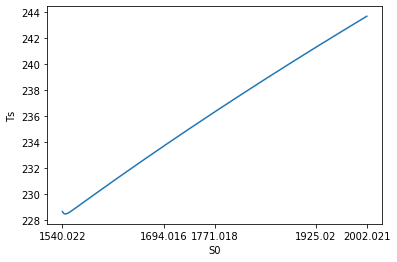

In [47]:
S0 = S0_change[len(S0_change) - 1]
ndays=60000
increase_rate = (S0*1.3 - S0)/ndays
Ts_days_2 = np.zeros(ndays)
S0_change_2 = np.zeros(ndays)

for i in range(ndays):
    if i == 0:
        S0_change_2[i] = S0
        f = lambda t,y: climate_tendency(t, y, S0)
        tt, rr = ode45(f, [0, 24*3600], Ts_days[len(Ts_days)-1])
        Ts_days_2[i] = rr[len(rr)-1]
    else:
        S0_change_2[i] = S0_change_2[i-1] + increase_rate
        f = lambda t,y: climate_tendency(t, y, S0_change_2[i])
        tt, rr = ode45(f, [0, 24*3600], Ts_days_2[i-1])
        Ts_days_2[i] = rr[len(rr)-1]

## plotting S0 vs Ts
plt.figure()
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(Ts_days_2.tolist())
ax.set_xticks((1, 20000, 30000, 50000, 60000))
ax.set_xticklabels(np.round(S0_change_2, 3)[[0, 19999, 29999, 49999, 59999]])

plt.xlabel('S0')
plt.ylabel('Ts')

#### Put 2 figures together

Text(0, 0.5, 'Ts')

<Figure size 432x288 with 0 Axes>

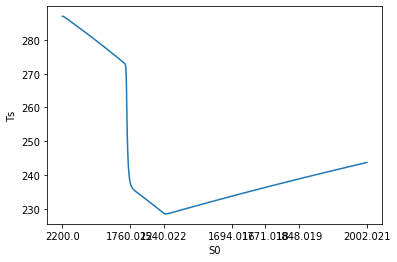

In [49]:
plt.figure()
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(Ts_days.tolist() + Ts_days_2.tolist())
ax.set_xticks((1, 20000, 30000, 50000, 60000, 70000, 90000))
ax.set_xticklabels(np.array(np.round(S0_change, 3).tolist() + np.round(S0_change_2, 3).tolist())[[0, 19999, 29999, 49999, 59999, 69999, 89999]])

plt.xlabel('S0')
plt.ylabel('Ts')

#### Explaination

The temperature first decreased in the first around 17600 days and suddenly dropped dramatically then furthur to deacrease till the end of 30000 days. The temperature continue to decrease a little bit before it starts to increase again when gradually increase the solar constant. One possible reason is that once the earth become colder, it tends to reflect more energy back, so it is harder for the earth surface to keep the temperature even later increase the solar constant

<i>4. Given the complexity of the climate system, what is the value of
such a simple model?</i>

The value of simple model like in this question is that it is easy derive and explain,  so it can be used as an initial step to build more complicated models

<h1>Problem 9</h1>

<i>9. (20 points) Stochastic population. Modify the code shown in class
(stochastic_simulation_logistic.m) to study the evolution of the probability distribution
with time. Note that the distribution that we derived analytically in the notes is the
equilibrium probability distribution, toward which the probability distribution will
evolve.
To do so, make a large number (say 5000) of realizations of the same system. While the
different realizations have identical parameters, because we are dealing with stochastic
systems (and we are using a random number generator to simulate it), the different
realizations will evolve differently.
Now run the 5000 realizations forward in time for 10000 time-steps. After every 100
time-steps, record the distribution of population among the 5000 realizations and plot it.
You could do this for every time step but doing this after every 100 time-steps reduces
the number of plots that you make.
Observe the evolution of the probability distributions.
Turn in your code and a brief report with plots of some representative probability
distributions and a brief discussion of what are shown. 
</i>

In [4]:
R=1
K=50
dimP=10*K
mu=R/K
lambda_var=R*(1-(1/K))
#print(lambda_var)
nsteps=10000 

def random_pop_generator(lambda_var, n, dt, mu):
    r=np.random.rand(1)
    if r<lambda_var*n*dt:
        N=n+1
    elif r<(lambda_var*n+mu*n*(n-1))*dt:
        N=n-1
    else:
        N=n
    return N
    


In [58]:
nRealization = 5000
N = np.zeros((nRealization, nsteps))

# initialization
N[:, 0] = 3
t=1
dt=10**(-3)

while t<nsteps-1:
    for i in range(1, nRealization):
        N[i, t] = random_pop_generator(lambda_var, N[i-1, t-1], dt, mu)
        
    #if t % 100 == 0 and t>0:
        # plot distribution for every 100 time steps
        # _ = plt.hist(N[:, t], bins='auto')
        # plt.title("Distribution of N at time-step" + str(t))
    
    t = t+1
        

Text(0.5, 1.0, 'Distribution of N at time-step 100')

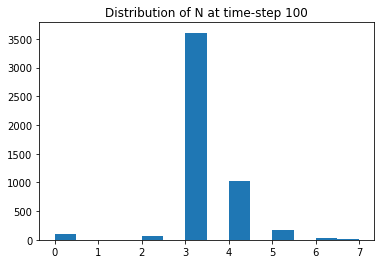

In [74]:
# plot distribution of t=100
_ = plt.hist(N[:, 100], bins='auto')
plt.title("Distribution of N at time-step " + str(100))

Text(0.5, 1.0, 'Distribution of N at time-step 200')

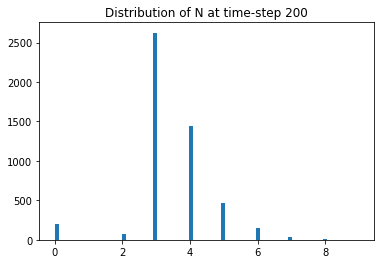

In [66]:
# plot distribution of t=200
_ = plt.hist(N[:, 200], bins='auto')
plt.title("Distribution of N at time-step " + str(200))

Text(0.5, 1.0, 'Distribution of N at time-step 500')

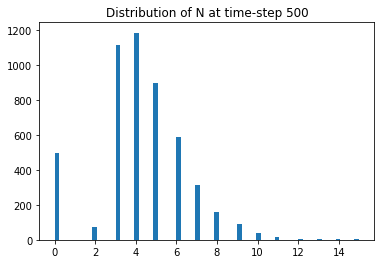

In [67]:
# plot distribution of t=500
_ = plt.hist(N[:, 500], bins='auto')
plt.title("Distribution of N at time-step " + str(500))

Text(0.5, 1.0, 'Distribution of N at time-step 1000')

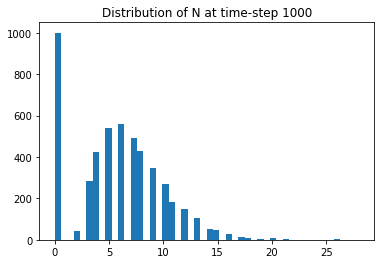

In [68]:
# plot distribution of t=1000
_ = plt.hist(N[:, 1000], bins='auto')
plt.title("Distribution of N at time-step " + str(1000))

Text(0.5, 1.0, 'Distribution of N at time-step 2000')

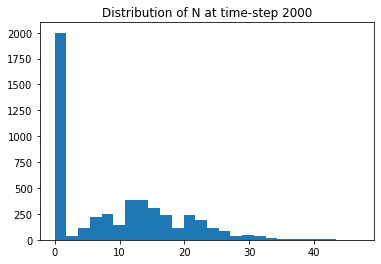

In [73]:
# plot distribution of t=2000
_ = plt.hist(N[:, 2000], bins='auto')
plt.title("Distribution of N at time-step " + str(2000))

The representative plots are shown above. It shows the distribution of population of 5000 realizations at different time steps.
The distribution is evolved with the time steps and seems turns to be a truncated poison distribution.

<h1>Problem 10</h1>

<i>10. (Extra credit, 10 points) Valentine’s day Valentine’s day is around the corner. A
local florist comes to you to consult how many roses she should order. If she orders too
many, roses are perishable and those that not sold by Valentine’s day’s end will be lost. If
she orders too few, she will lose valuable sales opportunities; sales for the Valentine’s
day represent a significant portion of the annual sales for the florist. What factors would
you consider, what information would you gather, what approaches (deterministic or
probabilistic) would you take towards building a mathematical model to help the florist?
You are only asked to sketch out some ideas; no equations are necessary at this stage.
Happy Valentine’s Day, everyone!</i>

In this problem, we are trying to maximize the profit P of florist, and can
choose how many roses he/she orders, noting that P = R - C where R is our revenue function described below. Let C be the cost function that gives how much the florist must pay to purchase the roses as a function of number of roses purchased.

Our main difficulty is defining our revenue function R, which will introduce probabilistic elements to this problem. This is because it is not certain how many roses the florist will sell. For different numbers of roses the florist chooses to buy, we will be able to and P by adding the expectation of R. Our revenue may depend on the following parameters as well:

-number of roses the florist sells
-population of the area near the florist
-competition from competing florists, or online ower shops 
Other factors that may be relevant could be how fast the roses expire, what
time period Valentine's day shopping usually occurs prior to Valentine's day.

What seems to make this problem challenging is that we cannot use Lagrange multipliers, or other calculus techniques to and optimize of our profit function.

Also, the probabilistic nature of the revenue function makes this problem different than other typical Lagrange-multiplier functions, since from past experience, usually both the cost and revenue functions do not involve uncertainty. Somethings we discussed were how we might be able to optimize P despite the discrete nature of this problem.